<a href="https://colab.research.google.com/github/CarlosARossi/dataScienceCoder/blob/main/Data_StoryTelling%2BRossi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Story Telling


### Objetivos generales

1. Iniciar el proceso de Data Storytelling respondiendo las preguntas que se quieran responder







## 1. Análisis de Datos

### 1.1. Importación de librerias y datasets

In [1]:
import pandas as pd
import numpy as np
import re
import scipy.stats as stats
from scipy.stats import linregress


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import matplotlib.ticker as ticker

Importo el dataset generado en el notebook [Data_Wrangling+Rossi.ipynb](https://github.com/CarlosARossi/dataScienceCoder/blob/main/Data_Wrangling%2BRossi.ipynb), en el cual se aplicó un proceso de limpieza y exploración de datos sobre el dataset generado en el notebook [ProyectoDS_ParteII_+Rossi.ipynb](https://github.com/CarlosARossi/dataScienceCoder/blob/main/ProyectoDS_ParteII_%2BRossi.ipynb).

In [2]:
url = 'https://raw.githubusercontent.com/CarlosARossi/dataScienceCoder/main/Datasets/salaries_data_wrangling.csv'
salaries = pd.read_csv(url)
salaries

,Age.Range,Years.of.Experience,Industry,Job.Title,Company.Name,Education,Country,Gender,Monthly.SalaryUSD,GroupedIndustry,GroupedJobTitle,GroupedCompany
0,18-21,3.0,GAMING,STREAMER,TWITCH,None,UNITED STATES,Male,40833.333333,Gaming,Others,OTHER
1,30-33,5.0,HEALTHCARE,AESTHETIC NURSE PRACTITIONER/BUSINESS OWNER,AESTHETIC CLINIC,Master's Degree,CANADA,Male,31691.088207,Healthcare,Nurse,OTHER
2,18-21,1.0,ONLINE ARCADE,OWNER,RUST CLASH,High School/GED,UNITED STATES,Male,40000.000000,Gaming,C Level,OTHER
3,18-21,2.0,CRYPTO,HEAD OF MARKETING,REDACTED,Some College,UNITED STATES,Male,40000.000000,Others,Marketing Manager/Coordinator,W/O COMPANY
4,34-37,13.0,WINDOW COVERINGS,OWNER,CAROLINA BLIND CRAFTERS,Bachelor's Degree,UNITED STATES,Female,40000.000000,Others,C Level,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...
31038,22-25,5.0,EDUCATION,PARAEDUCATOR,ELEMENTARY SCHOOL,Associate's Degree,UNITED STATES,Female,0.750000,Education & Research,Others,OTHER
31039,30-33,5.0,ECOMMERCE,DESIGN MANAGER,MIS,Bachelor's Degree,OTHERS,Male,0.092258,Retail,Others Managers,OTHER
31040,22-25,5.0,HOTEL/RESTAURANT,MANAGER/CHEF,CASA BAROLO,Bachelor's Degree,OTHERS,Female,1.363698,Food & Beverage,Others Managers,OTHER
31041,26-29,4.0,MATERIAL HANDLING,SOLUTIONS CONSULTANT,DEMATIC,Bachelor's Degree,UNITED STATES,Male,9166.666667,Others,Consultant,OTHER


In [3]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31043 entries, 0 to 31042
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age.Range            31043 non-null  object 
 1   Years.of.Experience  31043 non-null  float64
 2   Industry             31043 non-null  object 
 3   Job.Title            31043 non-null  object 
 4   Company.Name         31043 non-null  object 
 5   Education            31043 non-null  object 
 6   Country              31043 non-null  object 
 7   Gender               31043 non-null  object 
 8   Monthly.SalaryUSD    31043 non-null  float64
 9   GroupedIndustry      31043 non-null  object 
 10  GroupedJobTitle      31043 non-null  object 
 11  GroupedCompany       31043 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.8+ MB


### 1.2. Incorporación de datos de Google Maps mediante API

In [ ]:
!pip install googlemaps

import googlemaps

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40718 sha256=b21e939a3988548ebf8d99af5cec1eebe59adbc453bf693786f07c435d93c7b3
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps


In [ ]:
# Configura tu clave de API de Google Places
API_KEY = 'Insertar la KEY de Google Places'

Se generará un nuevo dataset que:

1. No contenga las instancias 'W/O COMPANY' y 'OTHER' de GroupedCompany, como tampoco OTHERS de Country.
2. De los filtrado en el punto anterior, nos quedaremos con las instancias unicas de GroupedCompany, pero que tengan el mismo Country.

In [ ]:
# Paso 1: Filtrar instancias no deseadas en GroupedCompany y Country
salaries_filtered = salaries[(salaries['GroupedCompany'] != 'W/O COMPANY') & (salaries['GroupedCompany'] != 'OTHERS')]
salaries_filtered = salaries_filtered[salaries_filtered['Country'] != 'OTHERS']

# Paso 2: Agrupar por GroupedCompany y Country, manteniendo todas las filas únicas
grouped_companies = salaries_filtered.groupby(['GroupedCompany', 'Country'], as_index=False).first()

# Paso 3: Crear un nuevo dataset solo con las columnas 'Company' y 'Country'
company_country = grouped_companies[['GroupedCompany', 'Country']].copy()

company_country

,GroupedCompany,Country
0,3M,UNITED STATES
1,ABBOTT,CANADA
2,ABBOTT,UNITED STATES
3,ACCENTURE,CANADA
4,ACCENTURE,GERMANY
...,...,...
236,WALGREENS,UNITED STATES
237,WALMART,CANADA
238,WALMART,UNITED STATES
239,WAYFAIR,UNITED STATES


In [ ]:
# Crea una instancia del cliente de Google Maps
gmaps = googlemaps.Client(key=API_KEY)

# Función para obtener información adicional de una empresa en Google Maps
def gmaps_information(company, country):

    # Realiza la solicitud de búsqueda
    results = gmaps.places_autocomplete(f'{company}, {country}')

     # Verifica si se encontraron resultados y si la solicitud fue exitosa
    if len(results) > 0:
        place_id = results[0]['place_id']

        # Realiza la solicitud de detalles del lugar utilizando el Place ID
        detalles = gmaps.place(place_id)


        # Verifica si se encontraron detalles y si la solicitud fue exitosa
        if 'result' in detalles and detalles['status'] == 'OK':
            primer_resultado = detalles['result']

            # Obtén la información adicional de la empresa
            score = primer_resultado.get('rating', 'Puntuación no disponible')
            num_reviews = primer_resultado.get('user_ratings_total', 'Cantidad de reseñas no disponible')

            # Devuelve la información obtenida
            return {'Score': score,
                    'Num_Reviews': num_reviews
                    }
    else:
        # No se encontraron resultados
        return {'Error': 'No se encontraron resultados para la empresa'}

# Crear una lista para almacenar los resultados
company_results = []

# Iterar sobre cada fila del dataset
for _, row in company_country.iterrows():
    company = row['GroupedCompany']
    country = row['Country']

    try:
        # Obtener información adicional de la empresa
        company_information = gmaps_information(company, country)
    except googlemaps.exceptions.ApiError as e:
        # Si se produce el error ApiError, imprime el mensaje de error y utiliza el Place ID predeterminado
        print(f"Error en el llamado a la función: {e}")


        place_id = 'ChIJrTLr-GyuEmsRBfy61i59si0' # Place ID predeterminado
        detalles = gmaps.place(place_id)
        primer_resultado = detalles['result']
        score = primer_resultado.get('rating', 'Puntuación no disponible')
        num_reviews = primer_resultado.get('user_ratings_total', 'Cantidad de reseñas no disponible')

        # Asignar la información obtenida con el Place ID predeterminado
        company_information = {'Score': score,
                               'Num_Reviews': num_reviews
                               }
        # Agregar los resultados a la lista
    company_results.append({
        'GroupedCompany': company,
        'Country': country,
        'Score.Google.Maps': company_information.get('Score', ''),
        'Num.Reviews': company_information.get('Num_Reviews', '')
    })
# Crear un nuevo dataframe con los resultados
company_gmaps = pd.DataFrame(company_results)

company_gmaps

,GroupedCompany,Country,Score.Google.Maps,Num.Reviews
0,3M,UNITED STATES,4.3,60
1,ABBOTT,CANADA,Puntuación no disponible,Cantidad de reseñas no disponible
2,ABBOTT,UNITED STATES,Puntuación no disponible,Cantidad de reseñas no disponible
3,ACCENTURE,CANADA,5,1
4,ACCENTURE,GERMANY,4.7,338
...,...,...,...,...
236,WALGREENS,UNITED STATES,4.1,38
237,WALMART,CANADA,Puntuación no disponible,Cantidad de reseñas no disponible
238,WALMART,UNITED STATES,3.7,8145
239,WAYFAIR,UNITED STATES,2.2,424


In [ ]:
pd.set_option("mode.use_inf_as_na", True)

# Paso 1: Crear un nuevo dataset company_gmaps_filtered
company_gmaps_filtered = company_gmaps.copy()

# Paso 2: Reemplazar valores no deseados con NaN en company_gmaps_filtered
company_gmaps_filtered.replace({'Score.Google.Maps': {'Puntuación no disponible': np.nan, '': np.nan},
                       'Num.Reviews': {'Cantidad de reseñas no disponible': np.nan, '': np.nan}}, inplace=True)

company_gmaps_filtered

,GroupedCompany,Country,Score.Google.Maps,Num.Reviews
0,3M,UNITED STATES,4.3,60.0
1,ABBOTT,CANADA,NaN,NaN
2,ABBOTT,UNITED STATES,NaN,NaN
3,ACCENTURE,CANADA,5.0,1.0
4,ACCENTURE,GERMANY,4.7,338.0
...,...,...,...,...
236,WALGREENS,UNITED STATES,4.1,38.0
237,WALMART,CANADA,NaN,NaN
238,WALMART,UNITED STATES,3.7,8145.0
239,WAYFAIR,UNITED STATES,2.2,424.0


In [ ]:
#Fusionar datos entre salaries y company_gmaps_filtered
salaries_gmaps = pd.merge(salaries, company_gmaps_filtered, left_on=['GroupedCompany', 'Country'],
                       right_on=['GroupedCompany', 'Country'], how='left')

salaries_gmaps

,Age.Range,Years.of.Experience,Industry,Job.Title,Company.Name,Education,Country,Gender,Monthly.SalaryUSD,GroupedIndustry,GroupedJobTitle,GroupedCompany,Score.Google.Maps,Num.Reviews
0,18-21,3.0,GAMING,STREAMER,TWITCH,None,UNITED STATES,Male,40833.333333,Gaming,Others,OTHER,NaN,NaN
1,30-33,5.0,HEALTHCARE,AESTHETIC NURSE PRACTITIONER/BUSINESS OWNER,AESTHETIC CLINIC,Master's Degree,CANADA,Male,31691.088207,Healthcare,Nurse,OTHER,5.0,3.0
2,18-21,1.0,ONLINE ARCADE,OWNER,RUST CLASH,High School/GED,UNITED STATES,Male,40000.000000,Gaming,C Level,OTHER,NaN,NaN
3,18-21,2.0,CRYPTO,HEAD OF MARKETING,REDACTED,Some College,UNITED STATES,Male,40000.000000,Others,Marketing Manager/Coordinator,W/O COMPANY,NaN,NaN
4,34-37,13.0,WINDOW COVERINGS,OWNER,CAROLINA BLIND CRAFTERS,Bachelor's Degree,UNITED STATES,Female,40000.000000,Others,C Level,OTHER,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31038,22-25,5.0,EDUCATION,PARAEDUCATOR,ELEMENTARY SCHOOL,Associate's Degree,UNITED STATES,Female,0.750000,Education & Research,Others,OTHER,NaN,NaN
31039,30-33,5.0,ECOMMERCE,DESIGN MANAGER,MIS,Bachelor's Degree,OTHERS,Male,0.092258,Retail,Others Managers,OTHER,NaN,NaN
31040,22-25,5.0,HOTEL/RESTAURANT,MANAGER/CHEF,CASA BAROLO,Bachelor's Degree,OTHERS,Female,1.363698,Food & Beverage,Others Managers,OTHER,NaN,NaN
31041,26-29,4.0,MATERIAL HANDLING,SOLUTIONS CONSULTANT,DEMATIC,Bachelor's Degree,UNITED STATES,Male,9166.666667,Others,Consultant,OTHER,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Ruta completa del archivo CSV en tu Google Drive
csv_file_path = '/content/drive/MyDrive/salaries_gmaps.csv'

# Exportar el DataFrame a un archivo CSV
salaries_gmaps.to_csv(csv_file_path, index=False)

Mounted at /content/drive


##2. Peguntas de interés

1. ¿Existe una relación entre el salario promedio de una empresa y su puntuación en Google Maps?
2. ¿Cuáles son las industrias con los salarios promedios más altos y más bajos?
3. ¿Hay una diferencia significativa en los salarios promedios entre hombres, mujeres y comunidad LGBTQ+?
4. ¿Que es lo que define la diferencia salarial entre puestos?
5. ¿El nivel educativo tiene alguna relación con el salario?



In [4]:
#Importo el dataset generado en el punto anterior
url = 'https://raw.githubusercontent.com/CarlosARossi/dataScienceCoder/main/Datasets/salaries_gmaps.csv'
salaries_gmaps = pd.read_csv(url)
salaries_gmaps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31043 entries, 0 to 31042
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age.Range            31043 non-null  object 
 1   Years.of.Experience  31043 non-null  float64
 2   Industry             31043 non-null  object 
 3   Job.Title            31043 non-null  object 
 4   Company.Name         31043 non-null  object 
 5   Education            31043 non-null  object 
 6   Country              31043 non-null  object 
 7   Gender               31043 non-null  object 
 8   Monthly.SalaryUSD    31043 non-null  float64
 9   GroupedIndustry      31043 non-null  object 
 10  GroupedJobTitle      31043 non-null  object 
 11  GroupedCompany       31043 non-null  object 
 12  Score.Google.Maps    6812 non-null   float64
 13  Num.Reviews          6812 non-null   float64
dtypes: float64(4), object(10)
memory usage: 3.3+ MB


### 2.1.Relación entre Salario y Puntuación de Google Maps


Se buscará explorar la relación entre el salario promedio de las empresas y la puntuación de Google Maps para entender cómo la remuneración de los empleados puede afectar la reputación en línea.

Analizar si existe una correlación entre ambas variables podría revelar cómo las empresas que ofrecen salarios competitivos y buenas condiciones de trabajo pueden generar una percepción favorable entre empleados y clientes.

In [5]:
# Filtrar las instancias con Score.Google.Maps no NaN
salaries_gmaps_filtered = salaries_gmaps.dropna(subset=['Score.Google.Maps'])

# Calcular la frecuencia de las categorías en GroupedJobTitle
score_counts = salaries_gmaps_filtered['Score.Google.Maps'].value_counts()

salaries_gmaps_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6812 entries, 1 to 31030
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age.Range            6812 non-null   object 
 1   Years.of.Experience  6812 non-null   float64
 2   Industry             6812 non-null   object 
 3   Job.Title            6812 non-null   object 
 4   Company.Name         6812 non-null   object 
 5   Education            6812 non-null   object 
 6   Country              6812 non-null   object 
 7   Gender               6812 non-null   object 
 8   Monthly.SalaryUSD    6812 non-null   float64
 9   GroupedIndustry      6812 non-null   object 
 10  GroupedJobTitle      6812 non-null   object 
 11  GroupedCompany       6812 non-null   object 
 12  Score.Google.Maps    6812 non-null   float64
 13  Num.Reviews          6812 non-null   float64
dtypes: float64(4), object(10)
memory usage: 798.3+ KB


In [6]:
# Agrupar por GroupedCompany y Country y calcular el promedio de Score.Google.Maps y Monthly.SalaryUSD
salaries_grouped_avg = salaries_gmaps_filtered.groupby(['GroupedCompany', 'Country'], as_index=False).mean()
salaries_grouped_avg

<ipython-input-6-c6662b1e6f1e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  salaries_grouped_avg = salaries_gmaps_filtered.groupby(['GroupedCompany', 'Country'], as_index=False).mean()


,GroupedCompany,Country,Years.of.Experience,Monthly.SalaryUSD,Score.Google.Maps,Num.Reviews
0,3M,UNITED STATES,3.100000,7439.183333,4.3,60.0
1,ACCENTURE,CANADA,3.857143,7414.605914,5.0,1.0
2,ACCENTURE,GERMANY,5.000000,6086.894635,4.7,338.0
3,ACCENTURE,UNITED KINGDOM,2.333333,6395.537845,4.6,252.0
4,ACCENTURE,UNITED STATES,3.490476,8560.221032,4.6,44.0
...,...,...,...,...,...,...
181,VMWARE,CANADA,12.000000,10671.488886,4.6,83.0
182,VMWARE,UNITED STATES,5.136364,9065.526515,4.7,86.0
183,WALGREENS,UNITED STATES,4.645833,5592.777778,4.1,38.0
184,WALMART,UNITED STATES,3.901408,6744.008216,3.7,8145.0


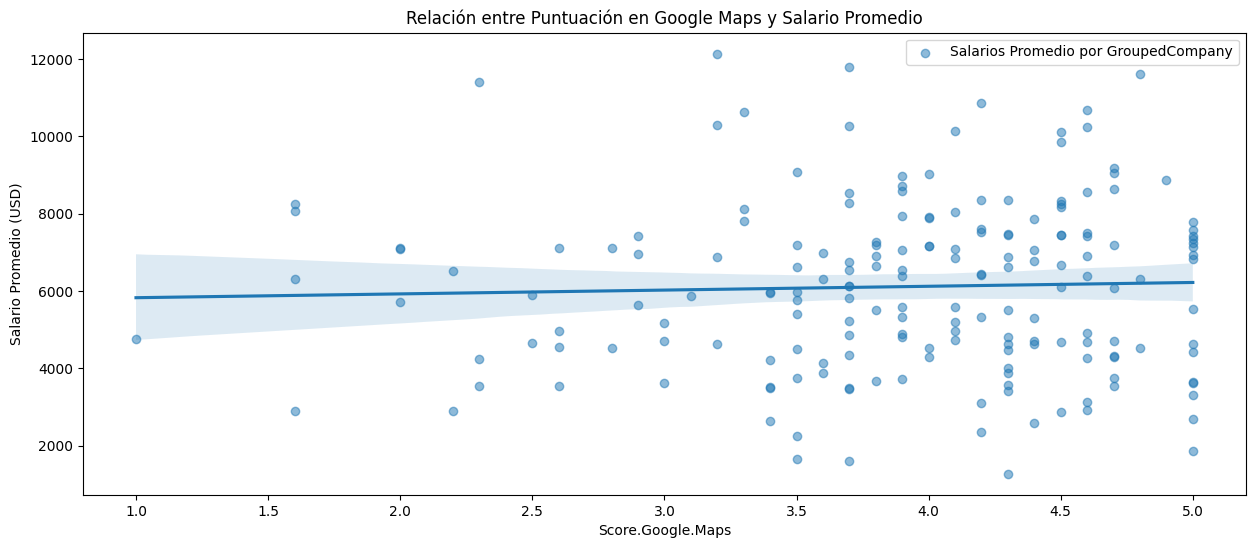

In [7]:
# Gráfico de dispersión con línea de regresión: Score.Google.Maps vs Salario Promedio por GroupedCompany
plt.figure(figsize=(15, 6))
sns.regplot(data=salaries_grouped_avg, x='Score.Google.Maps', y='Monthly.SalaryUSD', scatter_kws={'alpha':0.5}, label='Salarios Promedio por GroupedCompany')
plt.xlabel('Score.Google.Maps')
plt.ylabel('Salario Promedio (USD)')
plt.title('Relación entre Puntuación en Google Maps y Salario Promedio')
plt.legend()
plt.show()

In [8]:
# Ajustar un modelo lineal y obtener la ecuación de la línea de regresión para salaries_grouped_avg
slope, intercept, r_value, p_value, std_err = stats.linregress(salaries_grouped_avg['Score.Google.Maps'], salaries_grouped_avg['Monthly.SalaryUSD'])
equation_grouped = f"Salario Promedio (USD) = {slope:.2f} * Score.Google.Maps + {intercept:.2f}"

# Imprimir las ecuaciones de la línea de regresión
print("Ecuación de la línea de regresión para salaries_grouped_avg:", equation_grouped)

Ecuación de la línea de regresión para salaries_grouped_avg: Salario Promedio (USD) = 98.45 * Score.Google.Maps + 5731.06


El coeficiente de 98.45 nos indica que hay una relación positiva entre la puntuación de Google Maps y el salario promedio de las empresas, lo que significa que un aumento en la puntuación de Google Maps se podría asocia con un aumento en el salario promedio.

Sin embargo, el valor del coeficiente no es muy grande (98.45), lo que sugiere que el impacto de la puntuación de Google Maps en el salario promedio no es tan significativo. En otras palabras, la relación entre estas dos variables es positiva, pero la puntuación de Google Maps no es el único o el factor más influyente en la determinación de los salarios.

Por lo tanto, podemos concluir que aunque existe una relación positiva entre la puntuación de Google Maps y el salario promedio para cada combinación única de GroupedCompany y Country, esta relación no es tan fuerte, y otros factores también pueden estar desempeñando un papel importante en la determinación de los salarios en el conjunto de datos salaries_gmaps.

### 2.2.Industrías con los Salarios Promedios más altos y más bajos


<ipython-input-9-417b558e1e96>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_salaries = salaries_gmaps.groupby('GroupedIndustry').mean().sort_values(by='Monthly.SalaryUSD', ascending=False).reset_index()


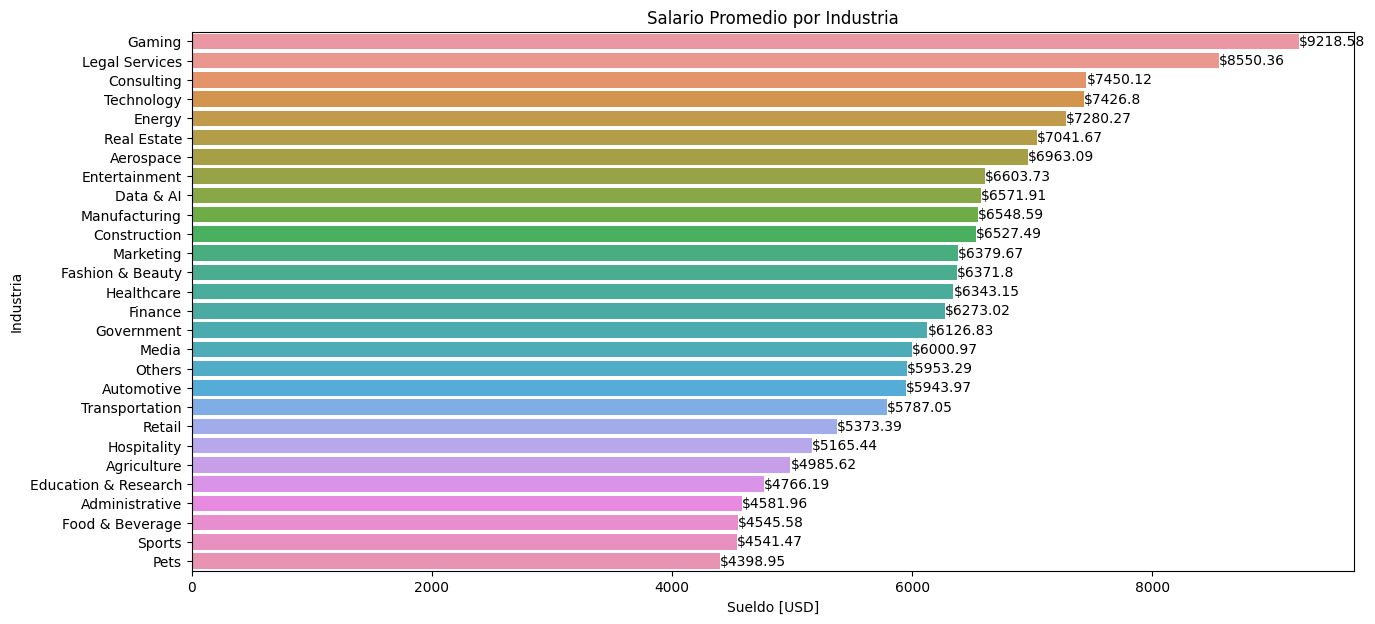

In [9]:
filtered_salaries = salaries_gmaps.groupby('GroupedIndustry').mean().sort_values(by='Monthly.SalaryUSD', ascending=False).reset_index()

# Graficar el salario promedio por país
plt.figure(figsize=(15,7))
sns.barplot(x='Monthly.SalaryUSD', y='GroupedIndustry', data=filtered_salaries)

# Mostrar valores de X en las barras
for i, v in enumerate(filtered_salaries['Monthly.SalaryUSD']):
    plt.text(v, i, f"${str(round(v,2))}", color='black', va='center')

plt.title('Salario Promedio por Industria')
plt.xlabel('Sueldo [USD]')
plt.ylabel('Industria')
plt.show()

Las industrias asociadas a la tecnología, como "Data & AI", "Consulting", "Energy", "Entertainment", "Gaming" y "Technology", o las asociadas a servicios especializados, como "Legal Services" o "Real Estate", tienen salarios promedios más altos, mientras que las industrias relacionadas con "Pets", "Sports", "Food & Beverage", "Administrative" y "Education & Research" tienen salarios promedios más bajos.

Esta información sugiere que, en general, las industrias de tecnología y servicios especializados suelen estar relacionadas con áreas especializadas y de alta demanda en el mercado laboral. Estas industrias a menudo requieren habilidades técnicas, conocimientos avanzados y experiencia específica, lo que puede conducir a una mayor valoración de los empleados y, por lo tanto, a salarios más altos.

Por otro lado, las industrias con salarios promedios más bajos, a menudo se asocian con roles más generales o servicios básicos que pueden no requerir habilidades altamente especializadas. Esto puede resultar en una menor valoración salarial en comparación con industrias que demandan una capacitación más especializada.

<ipython-input-10-1ca85abdae16>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_salaries = salaries_gmaps.groupby('GroupedCompany').mean().sort_values(by='Monthly.SalaryUSD', ascending=False).reset_index()


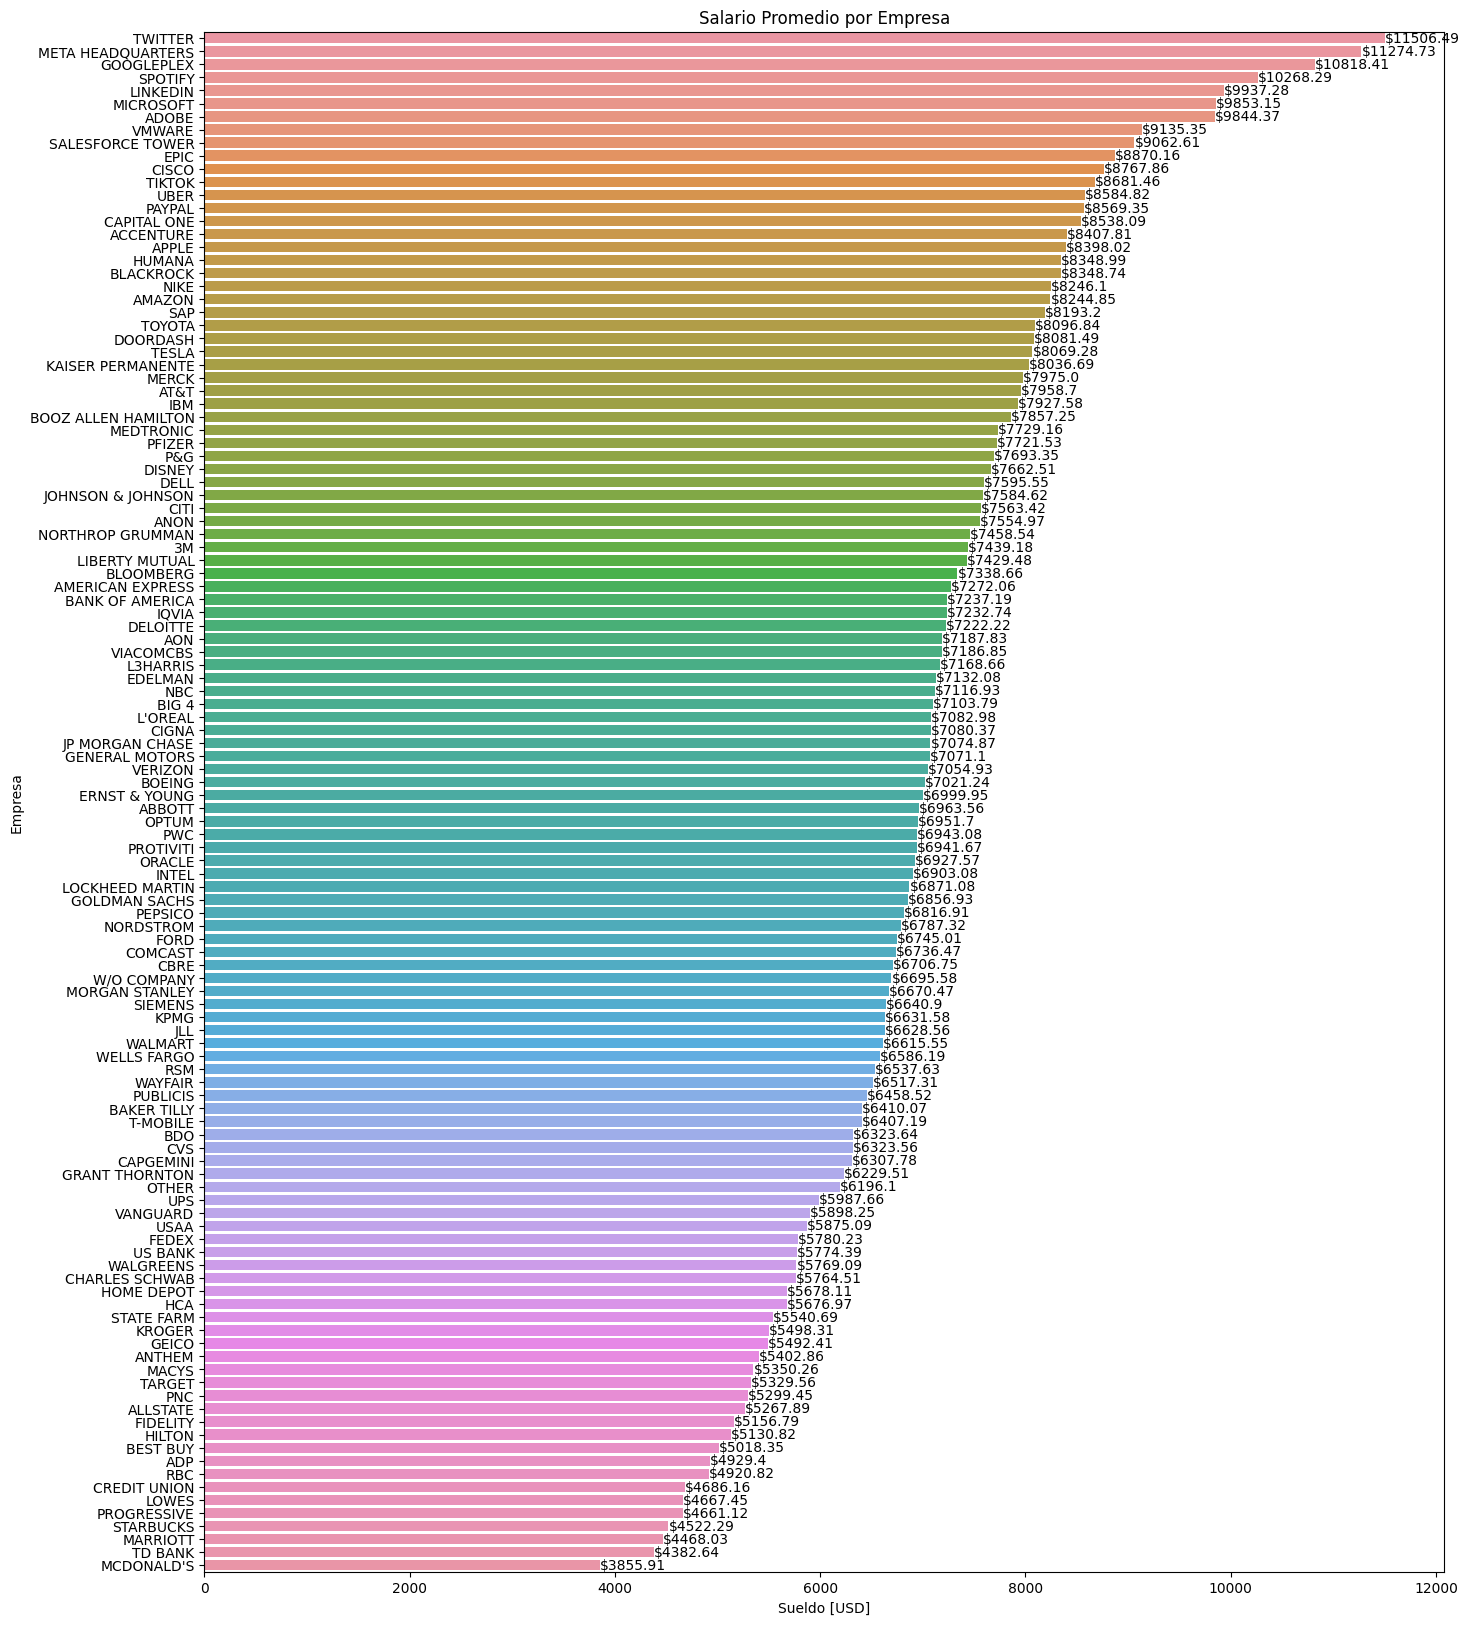

In [10]:
filtered_salaries = salaries_gmaps.groupby('GroupedCompany').mean().sort_values(by='Monthly.SalaryUSD', ascending=False).reset_index()

# Graficar el salario promedio por país
plt.figure(figsize=(16,20))
sns.barplot(x='Monthly.SalaryUSD', y='GroupedCompany', data=filtered_salaries)

# Mostrar valores de X en las barras
for i, v in enumerate(filtered_salaries['Monthly.SalaryUSD']):
    plt.text(v, i, f"${str(round(v,2))}", color='black', va='center')

plt.title('Salario Promedio por Empresa')
plt.xlabel('Sueldo [USD]')
plt.ylabel('Empresa')
plt.show()

En el gráfico anterior, podemos observar que las empresas con los salarios promedios más altos están dominadas por gigantes de la tecnología y empresas líderes en sus respectivas industrias, como Twitter, Google, Spotify y LinkedIn. Estas empresas generalmente ofrecen servicios o productos altamente especializados y están bien posicionadas en el mercado, lo que les permite ofrecer salarios competitivos para atraer y retener a profesionales altamente calificados.

Por otro lado, las empresas con los salarios promedios más bajos incluyen marcas más conocidas en la industria minorista y de servicios, como Starbucks, Marriott y McDonald's. Estas empresas suelen tener una estructura de empleo más diversa, que abarca roles desde empleados de nivel inicial hasta puestos de gestión, lo que puede influir en los salarios promedios más bajos.

En general, estas conclusiones subrayan la importancia de considerar el sector industrial al evaluar los salarios. El tipo de industria y la naturaleza de los roles laborales pueden influir en las diferencias salariales entre empresas y sectores.

### 2.3.Diferencias Salariales en función del Genero


Con el propósito de examinar posibles disparidades salariales en función del género, se procederá a filtrar del conjunto de datos aquellos puestos de trabajo que presenten únicamente un solo tipo de género. De esta manera, nos enfocaremos en los grupos de empleos que cuentan con una diversidad de géneros (2 o 3), lo que permitirá un análisis más específico sobre posibles diferencias salariales entre géneros en esos casos.

In [11]:
# Filtrar los GroupedJobTitle que tengan 2 o 3 Gender únicos
grouped_job_titles = salaries_gmaps.groupby('GroupedJobTitle')['Gender'].nunique()
selected_grouped_job_titles = grouped_job_titles[grouped_job_titles.isin([2, 3])].index

<ipython-input-12-95fc24a01543>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=selected_data, x='GroupedJobTitle', y='Monthly.SalaryUSD', hue='Gender', palette='coolwarm', ci=None)


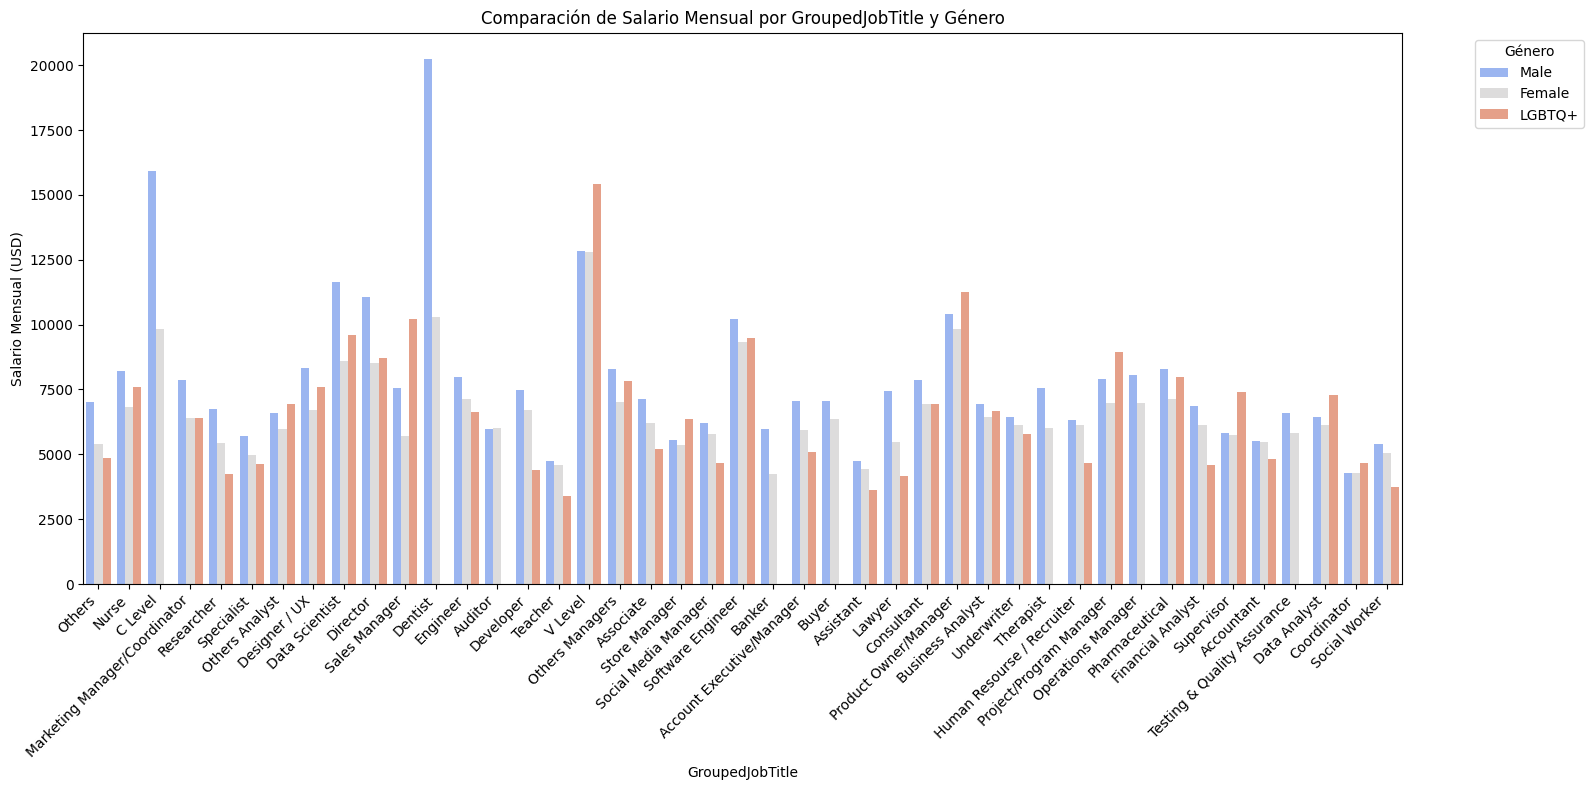

In [12]:
# Filtrar los datos por los GroupedJobTitle seleccionados
selected_data = salaries_gmaps[salaries_gmaps['GroupedJobTitle'].isin(selected_grouped_job_titles)]

# Gráfico comparativo de Monthly.SalaryUSD para los GroupedJobTitle seleccionados
plt.figure(figsize=(16, 8))
sns.barplot(data=selected_data, x='GroupedJobTitle', y='Monthly.SalaryUSD', hue='Gender', palette='coolwarm', ci=None)
plt.xlabel('GroupedJobTitle')
plt.ylabel('Salario Mensual (USD)')
plt.title('Comparación de Salario Mensual por GroupedJobTitle y Género')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Tras una primera observación del gráfico barplot, es evidente que el género masculino exhibe un salario promedio más alto en puestos similares. Para enriquecer el análisis y comprender mejor la relación entre las variables, se empleará un gráfico regplot, que permitirá visualizar las líneas de regresión lineal.

Esto nos ayudará a examinar de manera más detallada las tendencias y posibles correlaciones entre el género y el salario, proporcionando una perspectiva más completa de la situación salarial en función del género.

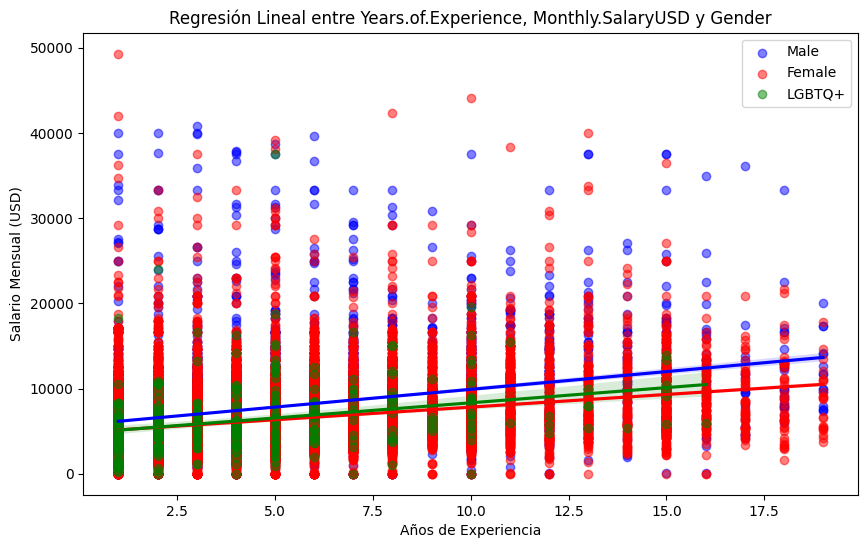

In [13]:
# Crear gráfico de dispersión con regresión lineal para cada género
plt.figure(figsize=(10, 6))
sns.regplot(data=selected_data[selected_data['Gender'] == 'Male'], x='Years.of.Experience', y='Monthly.SalaryUSD', scatter_kws={'alpha':0.5}, label='Male', color='blue')
sns.regplot(data=selected_data[selected_data['Gender'] == 'Female'], x='Years.of.Experience', y='Monthly.SalaryUSD', scatter_kws={'alpha':0.5}, label='Female', color='red')
sns.regplot(data=selected_data[selected_data['Gender'] == 'LGBTQ+'], x='Years.of.Experience', y='Monthly.SalaryUSD', scatter_kws={'alpha':0.5}, label='LGBTQ+', color='green')

plt.xlabel('Años de Experiencia')
plt.ylabel('Salario Mensual (USD)')
plt.title('Regresión Lineal entre Years.of.Experience, Monthly.SalaryUSD y Gender')
plt.legend()
plt.show()

In [14]:
# Filtrar los datos por los géneros seleccionados
male_data = selected_data[selected_data['Gender'] == 'Male']
female_data = selected_data[selected_data['Gender'] == 'Female']
lgbtq_data = selected_data[selected_data['Gender'] == 'LGBTQ+']

# Función para obtener la ecuación de la línea de regresión
def get_regression_equation(x, y):
    slope, intercept, _, _, _ = linregress(x, y)
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    return equation

# Obtener las ecuaciones de regresión para cada género
male_equation = get_regression_equation(male_data['Years.of.Experience'], male_data['Monthly.SalaryUSD'])
female_equation = get_regression_equation(female_data['Years.of.Experience'], female_data['Monthly.SalaryUSD'])
other_equation = get_regression_equation(lgbtq_data['Years.of.Experience'], lgbtq_data['Monthly.SalaryUSD'])

# Imprimir las ecuaciones de regresión
print("Ecuación de regresión para género Masculino:", male_equation)
print("Ecuación de regresión para género Femenino:", female_equation)
print("Ecuación de regresión para género LGBTQ+:", other_equation)

Ecuación de regresión para género Masculino: y = 416.50x + 5737.53
Ecuación de regresión para género Femenino: y = 296.97x + 4845.55
Ecuación de regresión para género LGBTQ+: y = 356.49x + 4758.21



En base a las ecuaciones de regresión obtenidas, se observa que existen diferencias significativas en la relación entre el salario promedio y los años de experiencia para cada género. Estas diferencias son importantes ya que indican disparidades salariales entre los géneros.

El género masculino muestra el mayor incremento en el salario promedio con respecto a los años de experiencia, seguido por el género LGBTQ+ y, por último, el género femenino. Esta discrepancia sugiere que, en promedio, los hombres experimentan un mayor crecimiento salarial en comparación con las mujeres y personas LGBTQ+ con niveles de experiencia similares.

### 2.4.Salarios promedios según el Puesto de Trabajo


<ipython-input-39-431ab0fe510d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_salaries = salaries_gmaps.groupby('GroupedJobTitle').mean().sort_values(by='Monthly.SalaryUSD', ascending=False).reset_index()


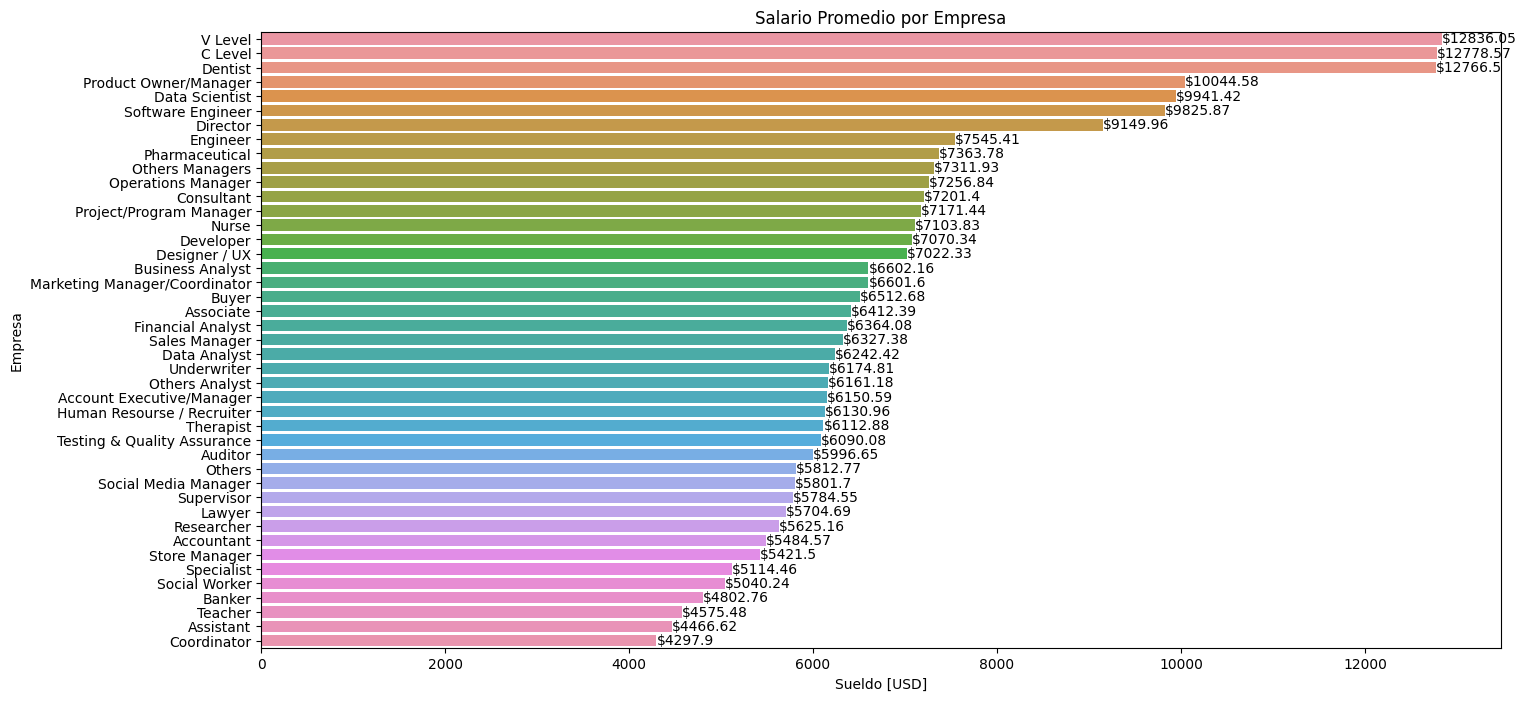

In [39]:
filtered_salaries = salaries_gmaps.groupby('GroupedJobTitle').mean().sort_values(by='Monthly.SalaryUSD', ascending=False).reset_index()

# Graficar el salario promedio por país
plt.figure(figsize=(16,8))
sns.barplot(x='Monthly.SalaryUSD', y='GroupedJobTitle', data=filtered_salaries)

# Mostrar valores de X en las barras
for i, v in enumerate(filtered_salaries['Monthly.SalaryUSD']):
    plt.text(v, i, f"${str(round(v,2))}", color='black', va='center')

plt.title('Salario Promedio por Empresa')
plt.xlabel('Sueldo [USD]')
plt.ylabel('Empresa')
plt.show()

El análisis del salario promedio según los puestos de trabajo revela una disparidad en los ingresos entre roles laborales. Puestos ejecutivos y especializados en tecnología tienen salarios más altos, mientras que roles generales presentan salarios más bajos. Las diferencias sugieren que el nivel jerárquico y la especialización influyen en los salarios promedio. Considerar estas disparidades es importante para establecer expectativas salariales y evaluar oportunidades laborales.

### 2.5.Influencia de la Educación sobre el Salario


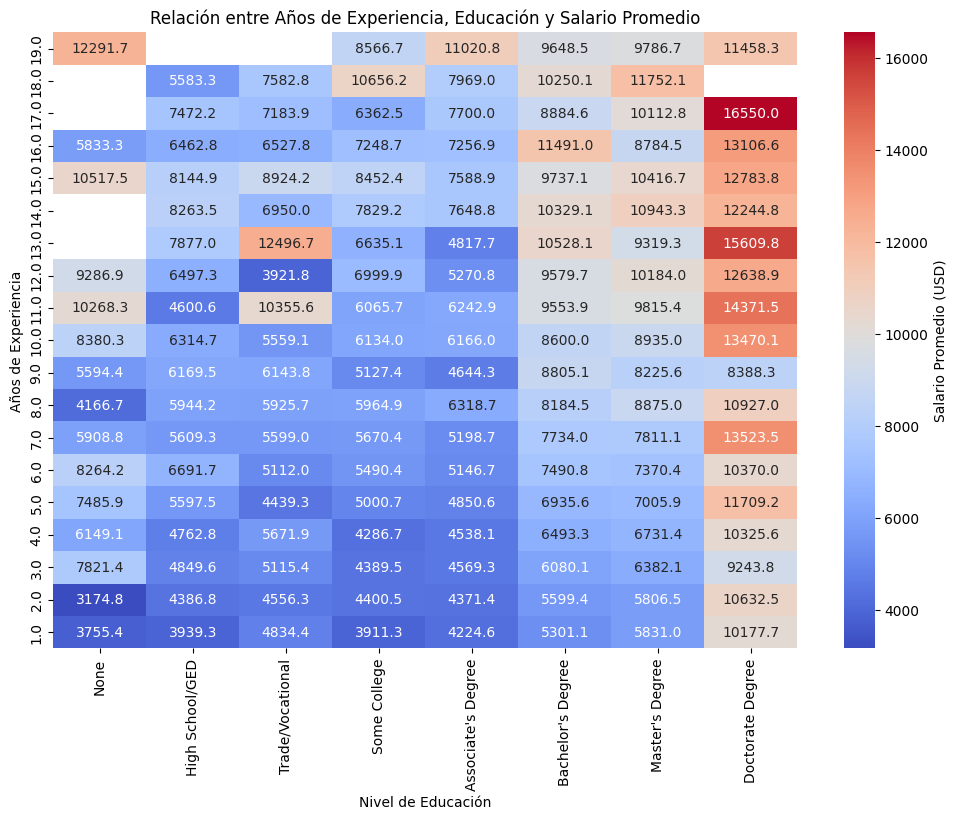

In [35]:
# Definir el orden de los tipos de estudios
education_order = ['None', 'High School/GED', 'Trade/Vocational', 'Some College', "Associate's Degree", "Bachelor's Degree", "Master's Degree", 'Doctorate Degree']

# Ordenar los niveles de educación en el DataFrame
salaries_gmaps['Education'] = pd.Categorical(salaries_gmaps['Education'], categories=education_order, ordered=True)

# Crear el heatmap para analizar la relación entre años de experiencia, educación y salario
plt.figure(figsize=(12, 8))
heatmap_data = salaries_gmaps.pivot_table(index='Years.of.Experience', columns='Education', values='Monthly.SalaryUSD', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Salario Promedio (USD)'})
plt.xlabel('Nivel de Educación')
plt.ylabel('Años de Experiencia')
plt.title('Relación entre Años de Experiencia, Educación y Salario Promedio')
plt.show()

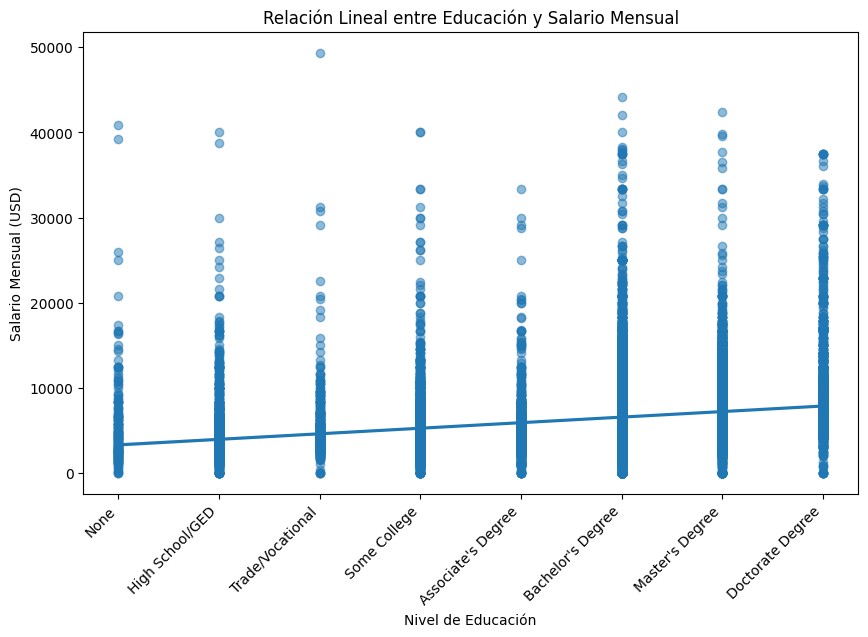

In [45]:
# Asignar un valor numérico a cada nivel de educación
salaries_gmaps['Education_num'] = salaries_gmaps['Education'].map({education: i for i, education in enumerate(education_order)})

# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(data=salaries_gmaps, x='Education_num', y='Monthly.SalaryUSD', scatter_kws={'alpha':0.5})
plt.xticks(ticks=range(len(education_order)), labels=education_order, rotation=45, ha='right')  # Etiquetas personalizadas para el eje x
plt.xlabel('Nivel de Educación')
plt.ylabel('Salario Mensual (USD)')
plt.title('Relación Lineal entre Educación y Salario Mensual')
plt.show()

In [44]:
# Ajustar un modelo lineal y obtener la ecuación de la línea de regresión
slope, intercept, r_value, p_value, std_err = stats.linregress(salaries_gmaps['Education_num'], salaries_gmaps['Monthly.SalaryUSD'])
equation_education = f"Salario Promedio (USD) = {slope:.2f} * Nivel de Educación + {intercept:.2f}"

# Imprimir las ecuaciones de la línea de regresión
print("Ecuación de la línea de regresión para la relación entre Educación y Salario:", equation_education)


Ecuación de la línea de regresión para la relación entre Educación y Salario: Salario Promedio (USD) = 651.51 * Nivel de Educación + 3325.87



La ecuación de regresión indica que, en promedio, cada aumento en el nivel de educación está relacionado con un incremento en el salario.

Por ejemplo, si una persona mejora su nivel educativo en una unidad, su salario promedio podría aumentar en aproximadamente 651.51 USD. Además, cuando una persona no tiene educación formal (nivel de educación igual a cero), el salario promedio es de aproximadamente 3325.87 USD.

Esto resalta la importancia de la educación en la determinación de los salarios, ya que una educación más alta suele estar asociada con mayores ingresos.